In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('clean_resume_data.csv')

In [5]:
df.head()

,ID,Category,Feature
0,16852973,HR,hr administrator marketing associate hr admini...
1,22323967,HR,hr specialist hr operations summary media prof...
2,33176873,HR,hr director summary years experience recruitin...
3,27018550,HR,hr specialist summary dedicated driven dynamic...
4,17812897,HR,hr manager skill highlights hr skills hr depar...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        2484 non-null   int64 
 1   Category  2484 non-null   object
 2   Feature   2483 non-null   object
dtypes: int64(1), object(2)
memory usage: 58.3+ KB


In [7]:
df.describe()

,ID
count,2.484000e+03
mean,3.182616e+07
std,2.145735e+07
min,3.547447e+06
25%,1.754430e+07
50%,2.521031e+07
75%,3.611444e+07
max,9.980612e+07


In [8]:
df.shape

(2484, 3)

In [9]:
c=df['Category'].value_counts()
c

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

In [10]:
c.index

Index(['INFORMATION-TECHNOLOGY', 'BUSINESS-DEVELOPMENT', 'FINANCE', 'ADVOCATE',
       'ACCOUNTANT', 'ENGINEERING', 'CHEF', 'AVIATION', 'FITNESS', 'SALES',
       'BANKING', 'HEALTHCARE', 'CONSULTANT', 'CONSTRUCTION',
       'PUBLIC-RELATIONS', 'HR', 'DESIGNER', 'ARTS', 'TEACHER', 'APPAREL',
       'DIGITAL-MEDIA', 'AGRICULTURE', 'AUTOMOBILE', 'BPO'],
      dtype='object', name='Category')

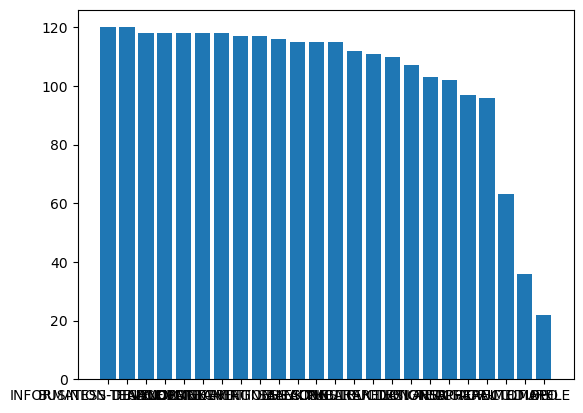

In [11]:
plt.bar(c.index,df['Category'].value_counts())
plt.show()

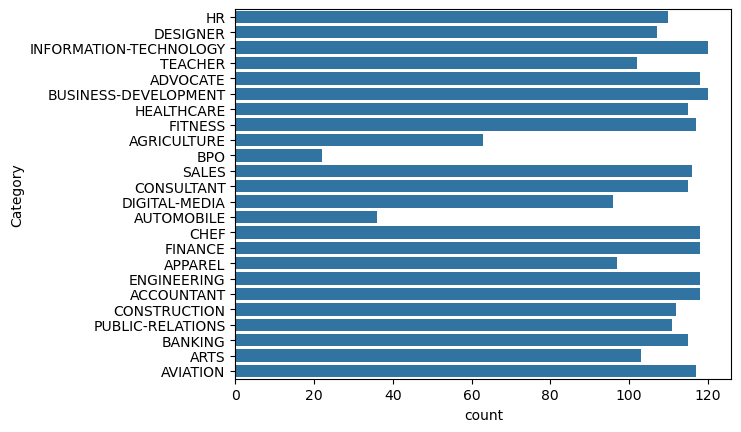

<Figure size 1500x500 with 0 Axes>

In [12]:
sns.countplot(df['Category']) #sns is built on top of matplotlib and it directly counts occurence of each attribute of column
plt.figure(figsize=(15,5))
plt.show()

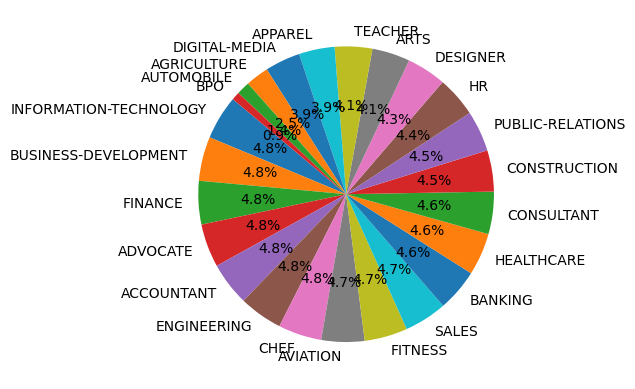

<Figure size 1500x3000 with 0 Axes>

In [13]:
category_counts = df['Category'].value_counts()
# Extract labels and sizes
labels = category_counts.index
sizes = category_counts.values
# Create the pie chart
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
#plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.figure(figsize=(15,30))
# Display the plot
plt.show()

### Balance Dataset

In [14]:
from sklearn.utils import resample
max_count=category_counts.max()
balanced_data=[]
for category in df['Category'].unique():
    cd=df[df['Category']==category]
    if len(cd)<max_count:
        #overSampling
        bcd=resample(cd,replace=True,n_samples=max_count,random_state=42)
    else:
        #underSampling
        bcd=resample(cd,replace=False,n_samples=max_count,random_state=42)
    balanced_data.append(bcd)
bdf=balanced_df = pd.concat(balanced_data)   

In [15]:
bdf['Category'].value_counts()

Category
HR                        120
DESIGNER                  120
ARTS                      120
BANKING                   120
PUBLIC-RELATIONS          120
CONSTRUCTION              120
ACCOUNTANT                120
ENGINEERING               120
APPAREL                   120
FINANCE                   120
CHEF                      120
AUTOMOBILE                120
DIGITAL-MEDIA             120
CONSULTANT                120
SALES                     120
BPO                       120
AGRICULTURE               120
FITNESS                   120
HEALTHCARE                120
BUSINESS-DEVELOPMENT      120
ADVOCATE                  120
TEACHER                   120
INFORMATION-TECHNOLOGY    120
AVIATION                  120
Name: count, dtype: int64

In [16]:
bdf.isnull().sum()

ID          0
Category    0
Feature     1
dtype: int64

In [17]:
bdf.dropna(inplace=True) #dropping row with NaN feature

In [18]:
bdf.isnull().sum()

ID          0
Category    0
Feature     0
dtype: int64

### Train Test split

In [19]:
from sklearn.model_selection import train_test_split
x=bdf['Feature']
y=bdf['Category']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

### Encoding (TF-IDF)

In [20]:
#converting text to vector
from sklearn.feature_extraction.text import TfidfVectorizer
# Initialize the vectorizer
tfid = TfidfVectorizer()
# Fit and transform the training data
x_train_tfid = tfid.fit_transform(x_train)
# Transform the test data
x_test_tfid = tfid.transform(x_test)

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
rfc=RandomForestClassifier()
rfc.fit(x_train_tfid,y_train)
y_pred=rfc.predict(x_test_tfid)
acc=accuracy_score(y_test,y_pred)
print("Accuracy:",acc)

Accuracy: 0.8454861111111112


In [22]:
print(classification_report(y_test,y_pred))

                        precision    recall  f1-score   support

            ACCOUNTANT       0.74      0.95      0.83        21
              ADVOCATE       0.96      0.79      0.87        29
           AGRICULTURE       0.95      0.78      0.86        23
               APPAREL       1.00      0.81      0.89        21
                  ARTS       0.88      0.64      0.74        22
            AUTOMOBILE       1.00      1.00      1.00        19
              AVIATION       0.91      1.00      0.95        30
               BANKING       1.00      0.74      0.85        23
                   BPO       1.00      1.00      1.00        15
  BUSINESS-DEVELOPMENT       0.44      0.61      0.51        18
                  CHEF       0.96      0.96      0.96        28
          CONSTRUCTION       0.92      0.92      0.92        25
            CONSULTANT       0.95      0.61      0.75        31
              DESIGNER       0.93      0.93      0.93        28
         DIGITAL-MEDIA       0.76      

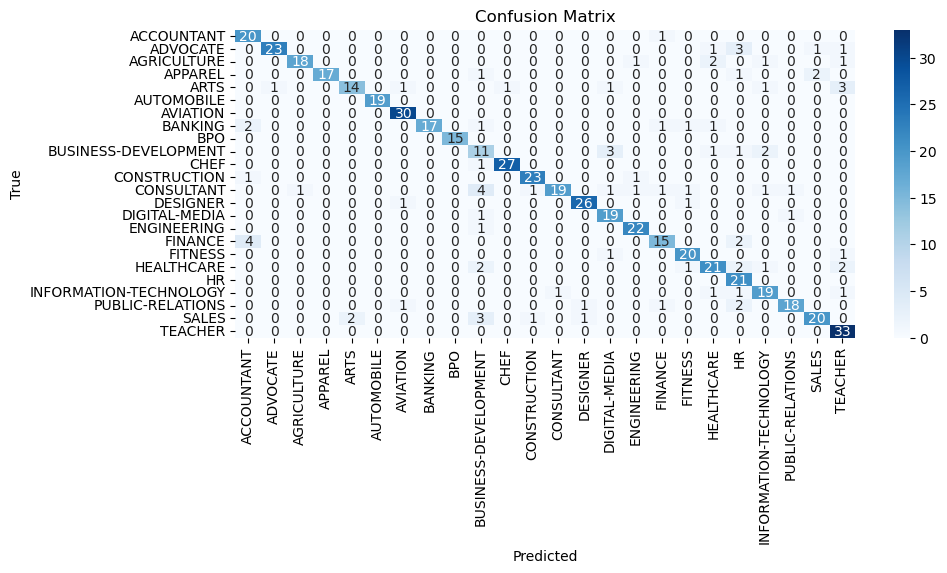

In [23]:
#confusion matrix
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(10,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rfc.classes_, yticklabels=rfc.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [27]:
# Clean resume
import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)  
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText


# Prediction and Category Name
def predict_category(resume_text):
    resume_text= cleanResume(resume_text)
    resume_tfidf = tfid.transform([resume_text])
    predicted_category = rfc.predict(resume_tfidf)[0]
    return predicted_category

<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:7: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\]'
<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:7: SyntaxWarning: invalid escape sequence '\S'
<>:8: SyntaxWarning: invalid escape sequence '\]'
<>:10: SyntaxWarning: invalid escape sequence '\s'
C:\Users\HP\AppData\Local\Temp\ipykernel_12356\1838275707.py:4: SyntaxWarning: invalid escape sequence '\S'
  cleanText = re.sub('http\S+\s', ' ', txt)
C:\Users\HP\AppData\Local\Temp\ipykernel_12356\1838275707.py:6: SyntaxWarning: invalid escape sequence '\S'
  cleanText = re.sub('#\S+\s', ' ', cleanText)
C:\Users\HP\AppData\Local\Temp\ipykernel_12356\1838275707.py:7: SyntaxWarning: invalid escape sequence '\S'
  cleanText = re.sub('@\S+', '  ', cleanText)
C:\Users\HP\AppData\Local\Temp\ipyker

In [28]:
# Example Usage
resume_file = """hr assistant summary hard worker dedicated detailed oriented experienced organized highly motivated many attributes possess individual years experience human resource administration customer service talent quickly adapt new challenges experience focused benefits administration payroll career development employment law highlights assigned administrative assignments daily basis implemented employee handbook processed documentation employees conducted employees performance reviews managed employee scheduling coordinated upper level co worker lower level teamwork oriented processed new recruits processed payroll performed check managed inventory supplies secured new wholesale food purveyor decrease costs increase profits accomplishments accomplishments pho n restaurant managed restaurant financial objectives developing financing establishing banking relationships prepared strategic annual forecasts budgets analyzing variances initiating corrective actions establishing financial controls developed implemented strategies increase average meal checks created restaurant business plan surveying restaurant demand conferring people community identifying evaluating competitors preparing financial marketing sales projections analyses estimates controlled purchases inventory meeting account manager negotiating prices contracts developing preferred supplier lists reviewing evaluating usage reports analyzing variances taking corrective actions contributed team effort inspired team members motivation provided high level customer service maintain high profile day day operations handled complaints contentious issues settled directly team members provides fast solution accomplished campaign recycle program divide right trash right bin accomplishments dr norman g mckoy associates demonstrated success administrative employee handbook developing team building programs corporate policies job descriptions management reports organized office documents patients charts organized office woking areas welcomed new employees organization conducting orientation organized employees document pockets maintained employees confidence protect operation keeping human resource information confidential maintained employee information entering updating employment status change data provided payroll information collecting time attendance records provided secretarial support entering formatting printing information organizing work answering telephone relaying messages maintaining equipment supplies experience company name city state hr assistant increased productivity physician office organizing patients charts converting digital files streamline patient maintenance processed pay roll paychex includes ensured vacation sick time tracked system answered payroll questions facilited resolutions payroll errors processed incoming mails going mails successfully edited employee handbook define job descriptions create office policies patient managing proper patient reports wrote employee handbook covering issues including disciplinary procedures code conduct fmla policy benefits information wrote standard operations procedures manual sops detailed aspect employee expectations designed implement overall recruiting strategy coordinated office manager recruit right candidates administering interviews conducting background checks processed documentation prepared reports relating personnel activities staffing recruitment training performance evaluations etc identified reduced business expenses increase profits controlling budget compares actual results budget expectations company name city state general manager current hostess waitress promoted interview recruit new hires order sustain longer hours operation thus increased company profitswas successful ensuring successful integration new hires implementing training compensation structures ordered foods supplies restaurant checked maintained inventory handling daily accounting processing payroll processed cost reduction thought venders whole sale increased marketability restaurant designing creating new modernized menu prepared willing step restaurant short staff low turn order increase productivity provide best service maintained great quality quantity foods restaurant created recycle program divided recyclable bin non recyclable waste bin education bachelor arts humanities english university thai chamber commerce city thailand humanities english excelled language culture transportation management critical reading article writing advanced technical reading master science human resource management strayer university city state usa human resource management magna cum laude excelled human resources law management ethical hr information systems hris strategic management registered professional human resources aphr certification hr designations registering aphr professional human resources exam expect complete aphr certification professional affiliations enrolling ongoing training areas compensation benefits employee labor relations leaves absence workers compensation workplace safety security member society human resource management shrm skills human resource management skills employment law hr policies procedures training development performance management employee relations mediation benefits administration orientation boarding organizational development staff life cycle computer skills hris applications peoplesoft enterprise human resources ms office word excel powerpoint access outlook e mailing tools ms outlook windows outlook yahoo google networking skills job boards networking sites soft skills professional communication skills interpersonal skills bilingual thai english excellent adaptability new environments hard working flexible reliable honest polite shape decision making excellent customer service skills creative
"""

predicted_category = predict_category(resume_file)
print("Predicted Category:", predicted_category)

Predicted Category: HR


In [29]:
import pickle
pickle.dump(rfc,open('models/rf_classifier_categorization.pkl','wb'))
pickle.dump(tfid,open('models/tfidf_vectorizer_categorization.pkl','wb'))